In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # for data import/data wrangling
import seaborn as sns # for statistical visualization

In [2]:
# load the data set

titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head() # shows first five lines of data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## let's select only the necessary columns for our data analysis

In [8]:
titanic = titanic.loc[:, ["Survived", "Pclass", "Sex", "Age", "Fare"]] #first colon means you select all the rows
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [9]:
titanic.shape

(891, 5)

In [10]:
titanic.value_counts("Pclass") #shows how many passengers in each cabin class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [11]:
titanic.describe() #shows summary stastics 

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [13]:
titanic.dtypes #checking datatypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
dtype: object

In [14]:
# Histogram: numerical variables

<Axes: xlabel='Age', ylabel='Count'>

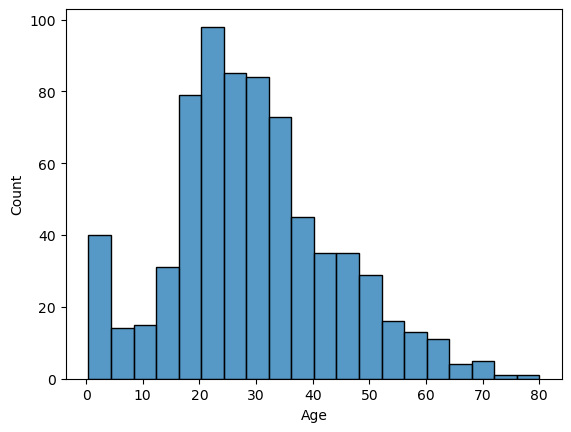

In [16]:
# histogram of age

sns.histplot(titanic, x = 'Age') #can also use matlab

<Axes: xlabel='Age', ylabel='Proportion'>

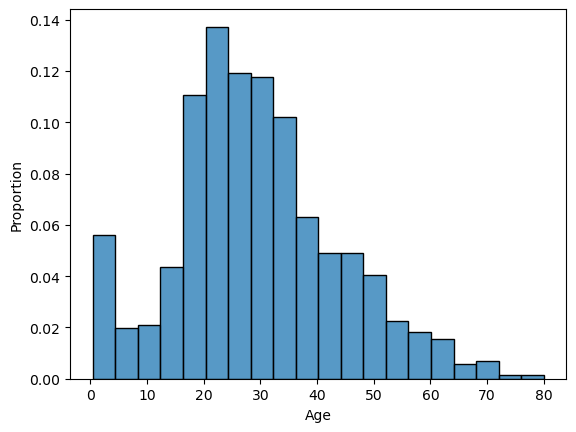

In [18]:
# relative frequency of age groups
sns.histplot(titanic, x = 'Age', stat = "proportion") # shows that approx 6% of passengers were between the ages of 0 and 4

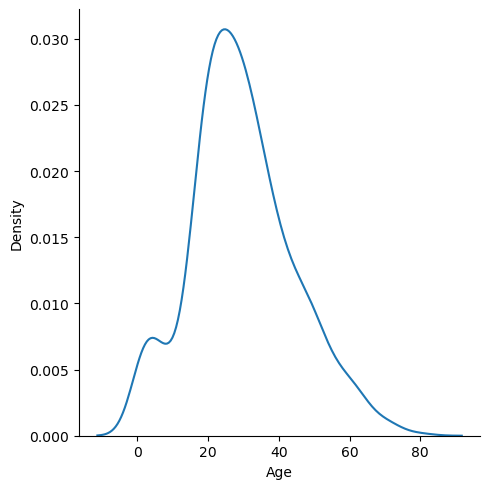

In [21]:
# density plot: continuous version of histogram

sns.displot(titanic, x = 'Age', kind = "kde")

<Axes: xlabel='Age', ylabel='Count'>

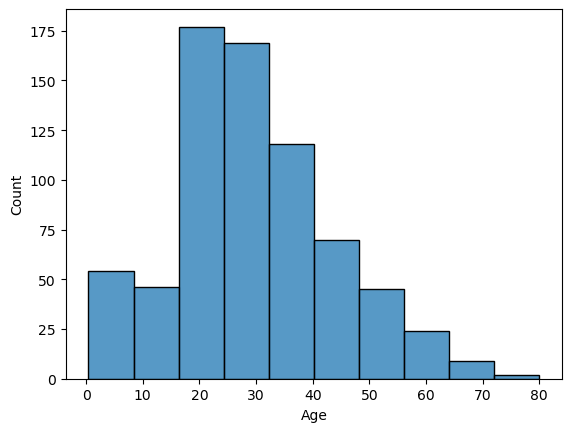

In [23]:
# we can change the number of bins

sns.histplot(titanic, x = 'Age', bins = 10)

In [24]:
# how to compare histogram of age across different groups?

<Axes: xlabel='Age', ylabel='Count'>

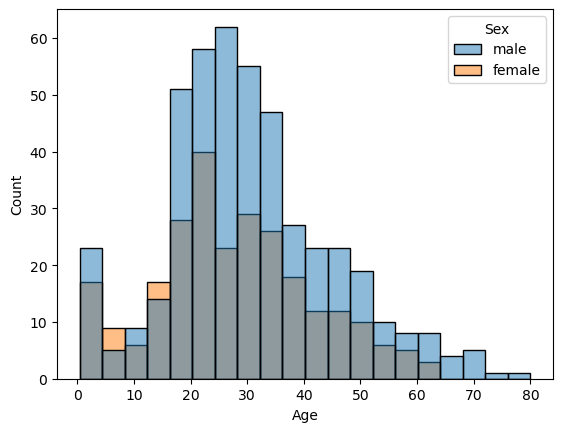

In [27]:
# Histogram of age for male vs female
sns.histplot(titanic, x = 'Age', hue = "Sex") # hue is for different colors which will be indicated in the legend
# the grey shown is the overlap of male/female

In [28]:
titanic.value_counts("Sex")

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

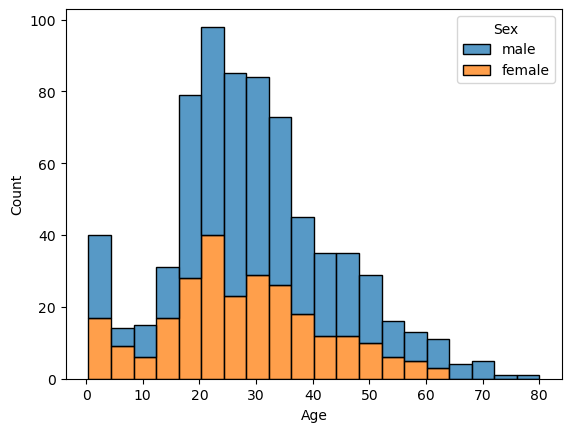

In [30]:
sns.histplot(titanic, x = "Age", hue = "Sex", multiple = "stack") # stacking instead of overlap

<Axes: xlabel='Age', ylabel='Count'>

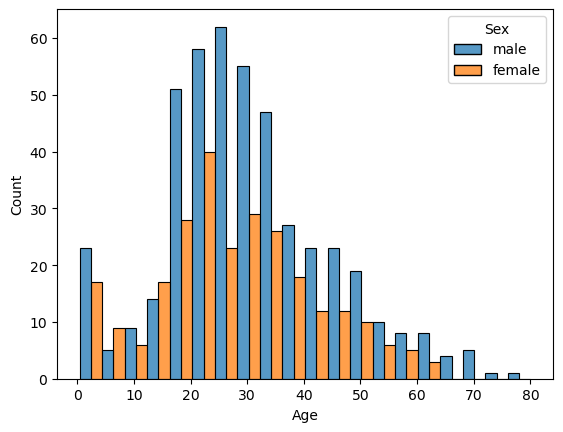

In [32]:
sns.histplot(titanic, x = "Age", hue = "Sex", multiple = "dodge") #side by side

In [33]:
# use facet grids to present age histogram of two different sexes in seperate grids

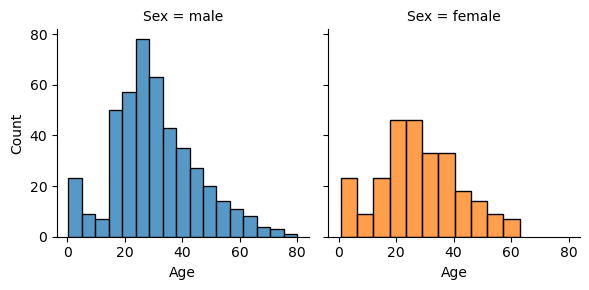

In [38]:
g1 = sns.FacetGrid(titanic, col = "Sex", hue = "Sex")
g1.map(sns.histplot, 'Age')
g1

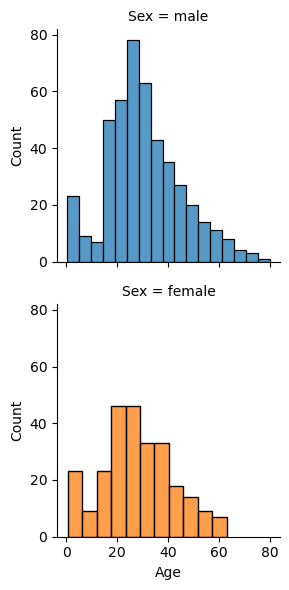

In [39]:
g1 = sns.FacetGrid(titanic, row = "Sex", hue = "Sex")
g1.map(sns.histplot, 'Age')
g1

In [41]:
?g1.map

Signature: g1.map(func, *args, **kwargs)
Docstring:
Apply a plotting function to each facet's subset of the data.

Parameters
----------
func : callable
    A plotting function that takes data and keyword arguments. It
    must plot to the currently active matplotlib Axes and take a
    `color` keyword argument. If faceting on the `hue` dimension,
    it must also take a `label` keyword argument.
args : strings
    Column names in self.data that identify variables with data to
    plot. The data for each variable is passed to `func` in the
    order the variables are specified in the call.
kwargs : keyword arguments
    All keyword arguments are passed to the plotting function.

Returns
-------
self : object
    Returns self.
File:      /opt/conda/lib/python3.12/site-packages/seaborn/axisgrid.py
Type:      method

In [46]:
# example

matrix_ex = np.array([[1,2,3],[4,5,6]])

In [47]:
matrix_ex

array([[1, 2, 3],
       [4, 5, 6]])

In [50]:
list(map(np.mean, matrix_ex)) # shows average of first row and second row of matrix

[np.float64(2.0), np.float64(5.0)]

In [52]:
# Boxplots

<Axes: ylabel='Fare'>

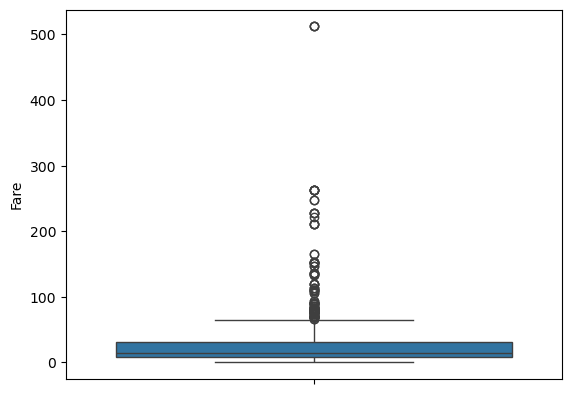

In [54]:
sns.boxplot(data = titanic, y = "Fare") #small black line on the blue box is the median line 

<Axes: xlabel='Pclass', ylabel='Fare'>

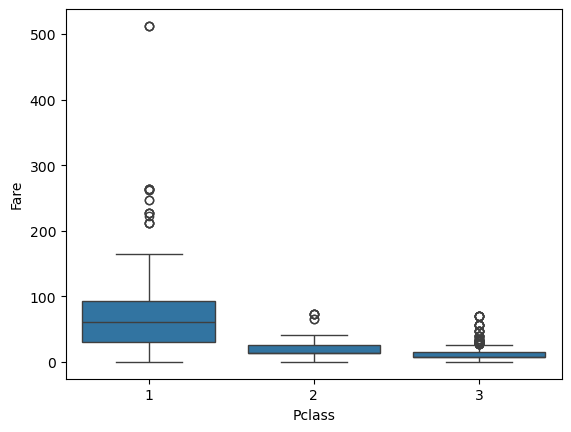

In [56]:
# Distribution of ticket fare across different cabin classes

sns.boxplot(data = titanic, y = "Fare", x = "Pclass")

<Axes: xlabel='Pclass', ylabel='Fare'>

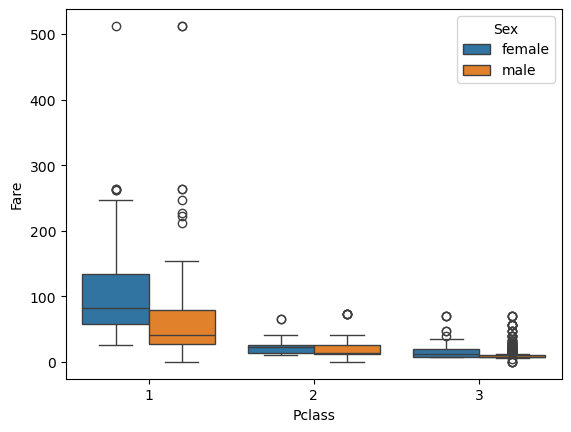

In [57]:
sns.boxplot(data = titanic, x = "Pclass", y = "Fare", hue = "Sex")

In [58]:
# compare the distribution of age of passengers across cabin classes

<Axes: xlabel='Pclass', ylabel='Age'>

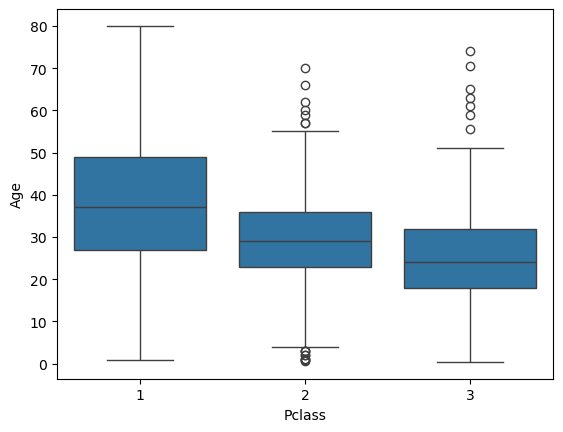

In [59]:
sns.boxplot(data = titanic, x = "Pclass", y = "Age")

In [61]:
# Countplot: frequency of data from each group categorical data

In [62]:
# first let us convert the data type of "Pclass" into categorical 

In [63]:
titanic["Pclass"] = pd.Categorical(titanic["Pclass"])

In [64]:
titanic.dtypes

Survived       int64
Pclass      category
Sex           object
Age          float64
Fare         float64
dtype: object

<Axes: xlabel='Pclass', ylabel='count'>

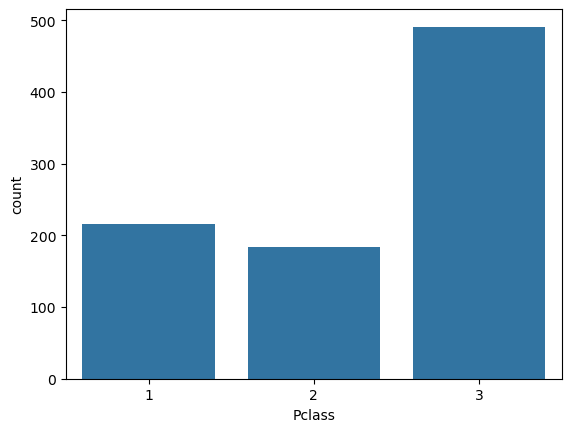

In [66]:
sns.countplot(titanic, x = "Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

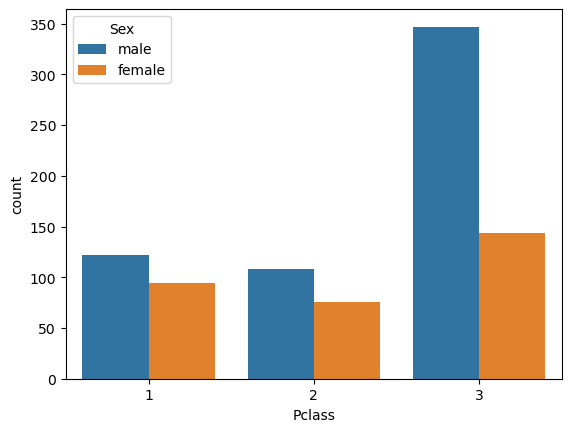

In [67]:
sns.countplot(titanic, x = "Pclass", hue = "Sex")

<Axes: xlabel='Pclass', ylabel='count'>

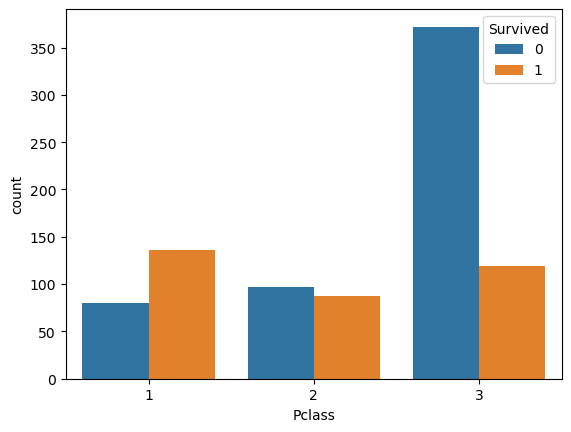

In [69]:
# compare the number of the survived from each class 
sns.countplot(titanic, x = "Pclass", hue = "Survived") # 0 = deaths, 1 = survived

/opt/conda/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


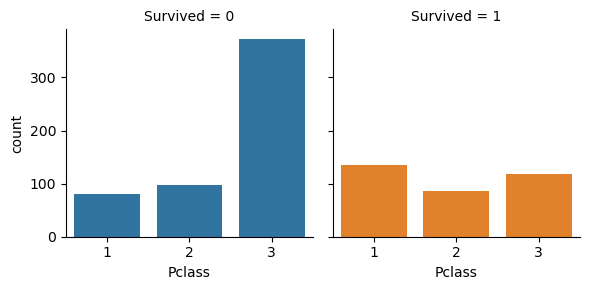

In [71]:
# use facet grid once again
g2 = sns.FacetGrid(titanic, col = 'Survived', hue = "Survived")
g2.map(sns.countplot, "Pclass")

In [72]:
# scatter plot: data from two numerical variables

<Axes: xlabel='Age', ylabel='Fare'>

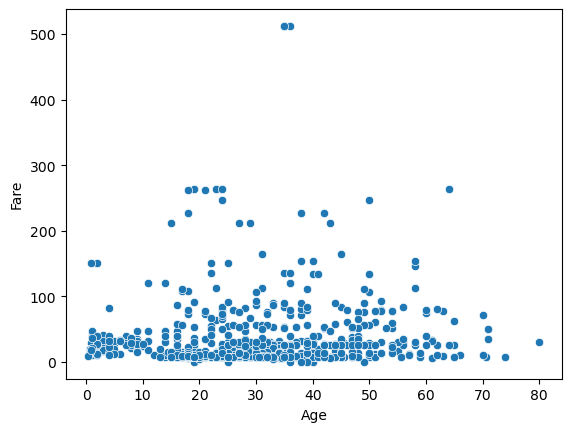

In [73]:
sns.scatterplot(data = titanic, x = 'Age', y = "Fare")

<Axes: xlabel='Age', ylabel='Fare'>

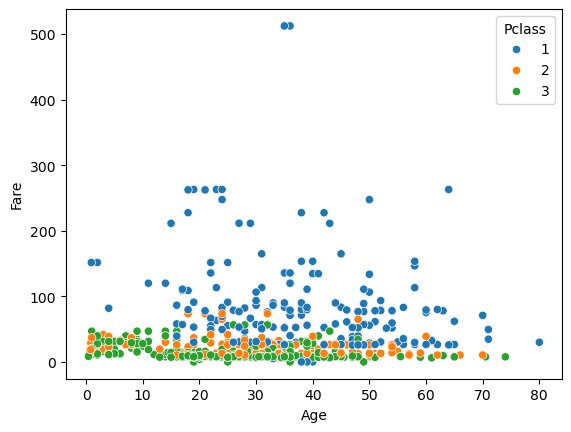

In [74]:
sns.scatterplot(data = titanic, x = "Age", y = "Fare", hue = "Pclass")

<Axes: xlabel='Age', ylabel='Fare'>

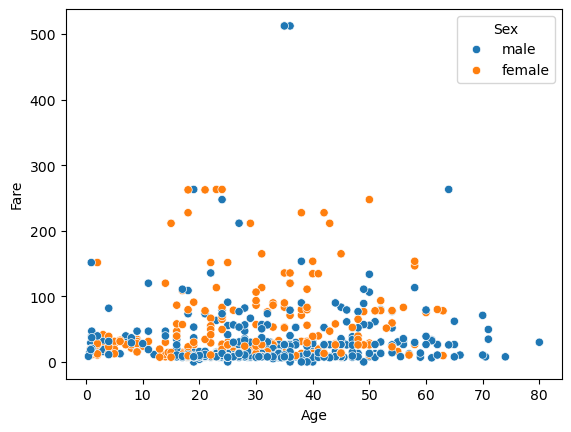

In [75]:
sns.scatterplot(data = titanic, x = 'Age', y = "Fare", hue = "Sex")

<Axes: xlabel='Age', ylabel='Fare'>

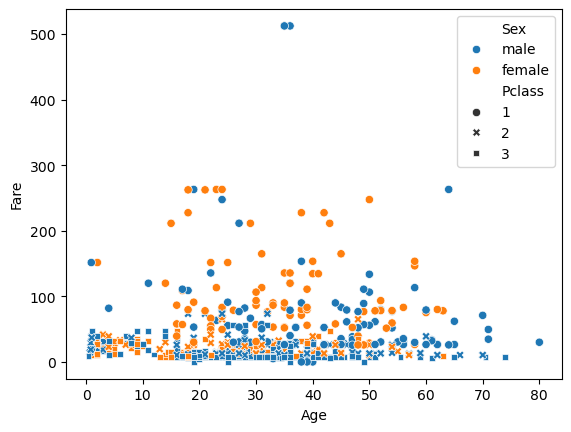

In [77]:
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare', hue = 'Sex', style = 'Pclass')

In [78]:
# Special Plots

In [79]:
# pair plot

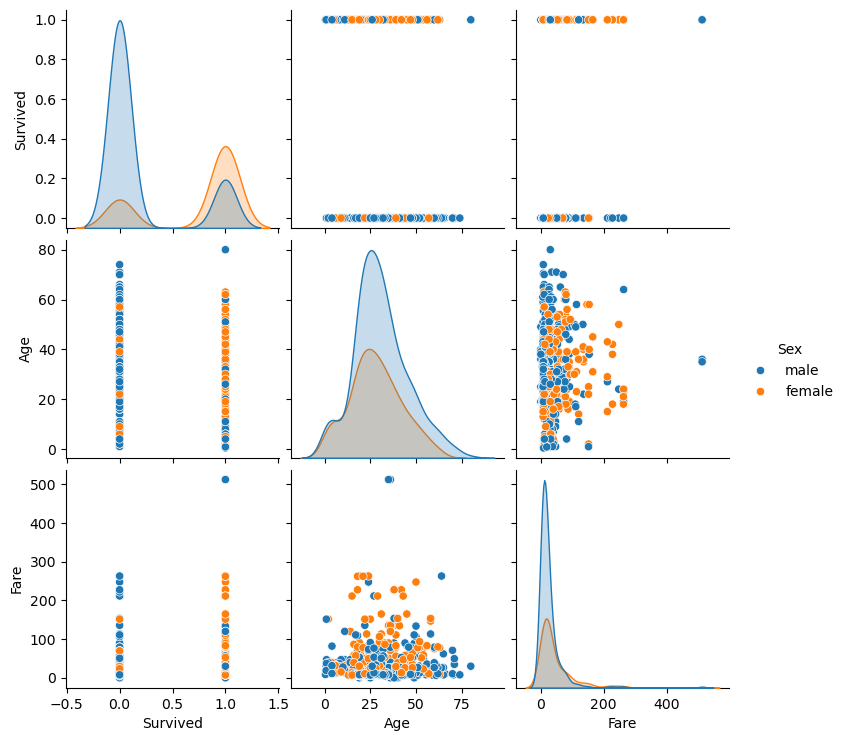

In [81]:
sns.pairplot(titanic, hue = "Sex")

In [84]:
# Heatmap: assigns different colors to different levels of numerical data

# frequency of data from each group of sex and passenger class 

titanic_summary = titanic.groupby(['Sex', 'Pclass'])['Fare'].count()

/tmp/ipykernel_219/3753199295.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_summary = titanic.groupby(['Sex', 'Pclass'])['Fare'].count()


In [85]:
titanic_summary

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Fare, dtype: int64

In [86]:
titanic_summary.columns

AttributeError: 'Series' object has no attribute 'columns'

In [87]:
titanic_summary = pd.DataFrame(titanic_summary)

In [88]:
titanic_summary = titanic_summary.reset_index()

In [89]:
titanic_summary

,Sex,Pclass,Fare
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


In [92]:
titanic_summary_wider = titanic_summary.pivot(index = ["Sex"], columns = "Pclass", values = "Fare")
titanic_summary_wider

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<Axes: xlabel='Pclass', ylabel='Sex'>

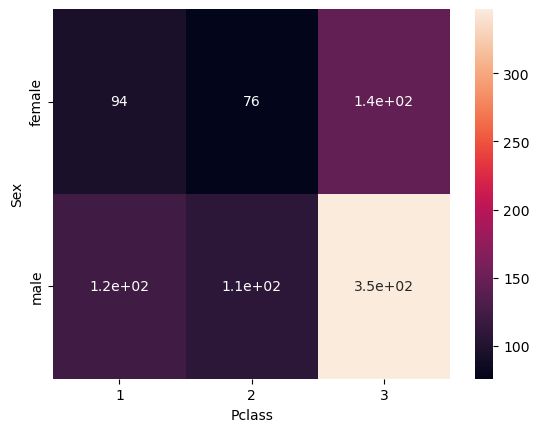

In [96]:
sns.heatmap(titanic_summary_wider, annot = True)

In [100]:
# how to generate subplots

x = titanic["Age"] 
y = titanic["Fare"]

Text(0.5, 1.0, 'Titanic data set: Age versus Fare')

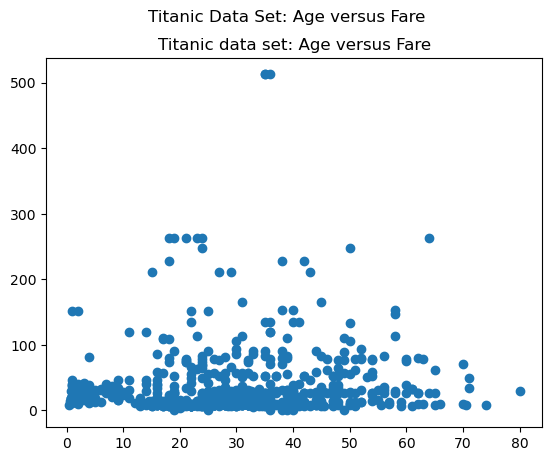

In [103]:
fig, ax = plt.subplots() # fig is a canvas, ax  is axes (the actual plots)
ax.scatter(x , y)
fig.suptitle('Titanic Data Set: Age versus Fare')
ax.set_title('Titanic data set: Age versus Fare')

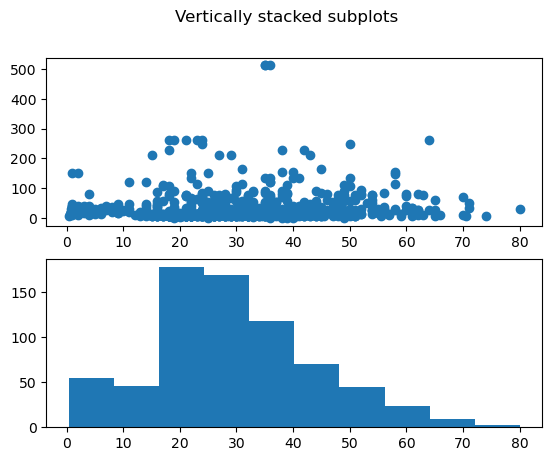

In [105]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.scatter(x, y)
ax2.hist(x);


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

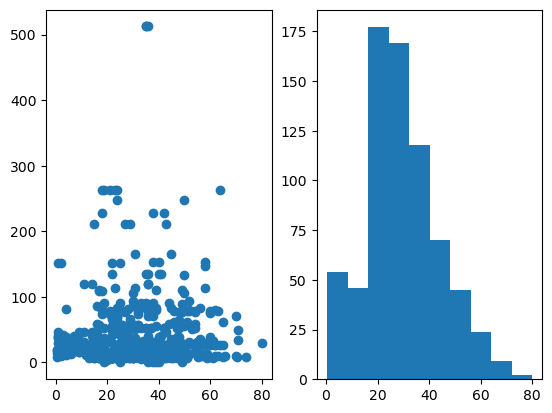

In [109]:
# horizontally stack
fig, axes = plt.subplots(1,2)
axes[0].scatter(x,y)
axes[1].hist(x)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

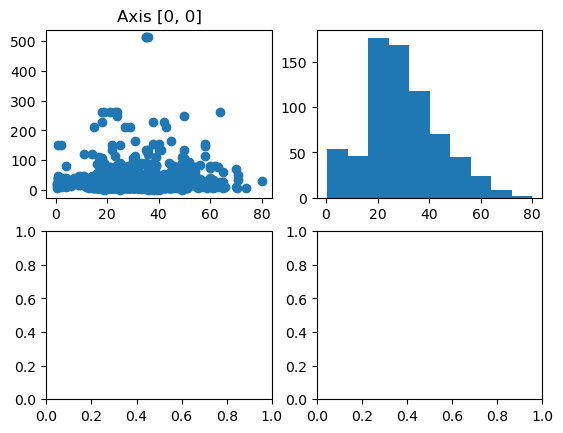

In [111]:
fig, axes= plt.subplots(2,2)
axes[0,0].scatter(x,y)
axes[0, 0].set_title('Axis [0, 0]')
axes[0,1].hist(x)


In [112]:
# refining our plots

Text(0, 0.5, 'Ticket Fare')

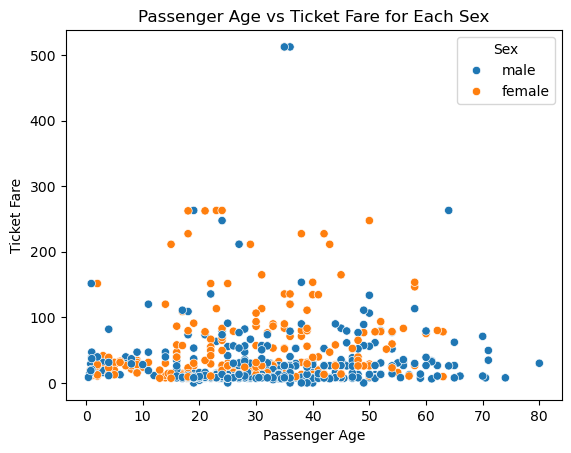

In [117]:
sns.scatterplot(data = titanic, x = 'Age', y = 'Fare', hue = 'Sex')
plt.title('Passenger Age vs Ticket Fare for Each Sex')
plt.xlabel('Passenger Age')
plt.ylabel('Ticket Fare')
# plt.legend(loc = 'right')

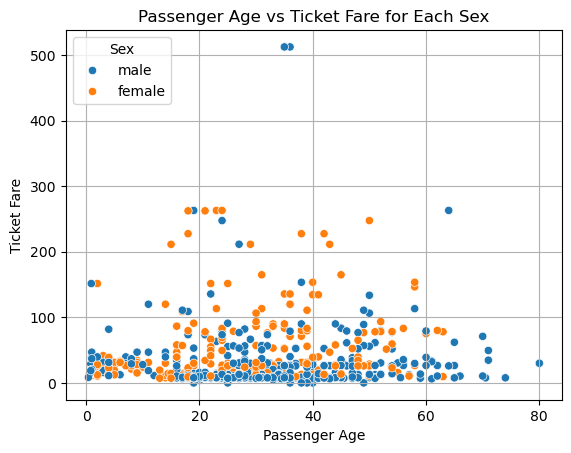

In [124]:
# refining the location of the legend
ax = sns.scatterplot(data = titanic, x = 'Age', y = 'Fare', hue = 'Sex')
plt.title('Passenger Age vs Ticket Fare for Each Sex')
plt.xlabel('Passenger Age')
plt.ylabel('Ticket Fare')
sns.move_legend(ax, "upper left", bbox_to_anchor = (0,1))
ax.set_xticks(range(0, 81, 20))
plt.grid()

In [125]:
# how to save your plot

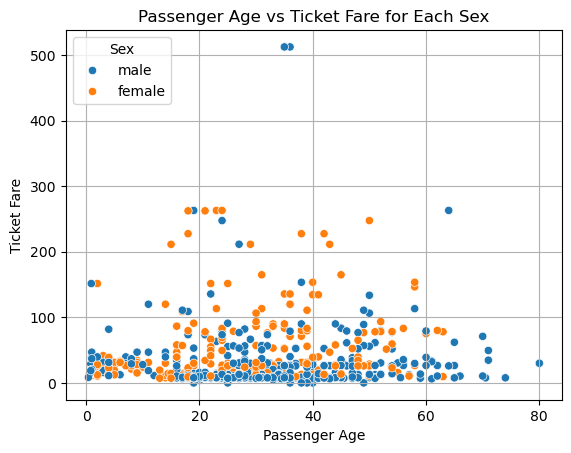

In [126]:
ax = sns.scatterplot(data = titanic, x = 'Age', y = 'Fare', hue = 'Sex')
plt.title('Passenger Age vs Ticket Fare for Each Sex')
plt.xlabel('Passenger Age')
plt.ylabel('Ticket Fare')
sns.move_legend(ax, "upper left", bbox_to_anchor = (0,1))
ax.set_xticks(range(0, 81, 20))
plt.grid()
plt.savefig('text_plot.png')